# Mass accuracy distribution
All peaks are off by some amount. We want to be able to catch it even when the mass is off slightly. In order to test it accurately, we must first find how much they are off

We have both (1) the results of a search and (2) the raw spectrum. We can calculate all of the theoretical spectra that we know we should have, then iterate through our spectra and find out the perturbations

## imports

In [21]:
from pyteomics.mzxml import read as mzxmlread
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.spectra import gen_spectra


In [52]:
# LOAD THE RESULTS FILE
resfile = '/Users/zacharymcgrath/Downloads/HeLa1_results.ssv'
df = pd.read_csv(resfile, sep=';')
df.head(2)


,number,filename,parent_charge,score,deltaForwardReverseScore,deltaRank1Rank2Score,percent_scored_peak_intensity,totalIntensity,previous_aa,sequence,next_aa,retentionTimeMin,chromatographicPeakWidthSec,parent_m_over_z,species,entry_name
0,1,HeLa1.6011.6074.2,2,10.24,NaN,1.95,78.2,2110000.0,(R),AILGSVER,(M),20.70,29.0,422.7481,HUMAN,"Probable threonyl-tRNA synthetase 2, cytoplasmic"
1,2,HeLa1.14552.14552.2,2,16.03,NaN,16.03,76.6,206000.0,(K),DASDDLDDLNFFNQK,(K),41.85,4.0,878.8885,HUMAN,Eukaryotic translation initiation factor 2 sub...


## load the mzxml
We can quickly identify which spectrum was given which sequence via the `filename` column. Each value in the mzxml file has a key value pair that looks like

`'parentFileName': 'NOD2_E3.0645.0737.2.pkl'`

So if wer remove the `.pkl` value, we can quickly match these up to find the the mass error tolerances


In [53]:
mzxmlfile = '/Users/zacharymcgrath/Downloads/HeLa1.mzXML'
d = mzxmlread(mzxmlfile)
filenameindexed = {}
for item in d:
    newindex = item['scanOrigin'][0]['parentFileName'].replace('.pkl', '')
    filenameindexed[newindex] = item

## For each sequence/spectrum match, find the peaks that are the closest match

In [54]:
def peak_distances(observed, reference):
    distances = []
    for mass in observed:
        distances.append(min([abs(mass - p) for p in reference]))
    return distances

def filter_by_intensity(masses, intensities, n):
    pos_intensities = [(i, intens) for i, intens in enumerate(intensities)]
    pos_intensities.sort(key=lambda x: x[1], reverse=True)
    pos_intensities = pos_intensities[:n]
    return [masses[i[0]] for i in pos_intensities]

In [55]:
distances = []
for idx, row in df.iterrows():
    fname = row['filename']
    reference_spectrum  = gen_spectra.gen_spectrum(row['sequence'] + 'X')['spectrum']
    observed_spectrum = filter_by_intensity(list(filenameindexed[fname]['m/z array']), list(filenameindexed[fname]['intensity array']), 20)
    distances += peak_distances(observed_spectrum, reference_spectrum)

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

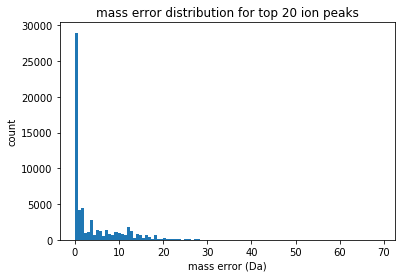

In [56]:
plt.hist(distances, bins=100)
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

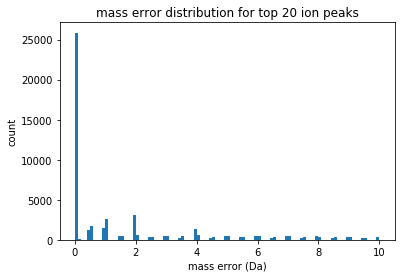

In [57]:
plt.hist(distances, bins=100, range=(0, 10))
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

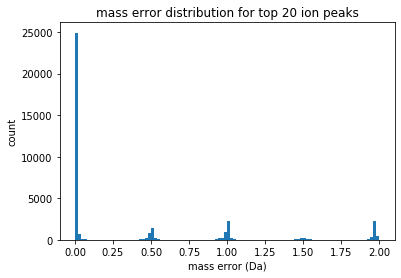

In [58]:
plt.hist(distances, bins=100, range=(0, 2))
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

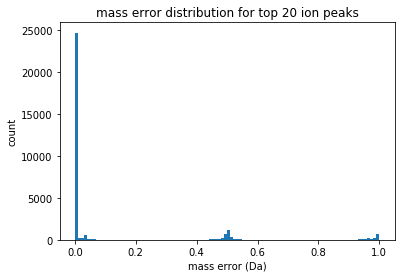

In [59]:
plt.hist(distances, bins=100, range=(0, 1))
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

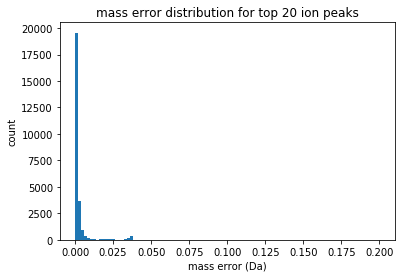

In [60]:
plt.hist(distances, bins=100, range=(0, 0.2))
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

Text(0.5, 1.0, 'mass error distribution for top 20 ion peaks')

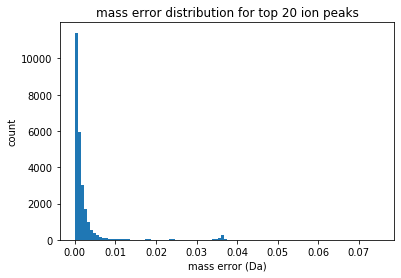

In [61]:
plt.hist(distances, bins=100, range=(0, 0.075))
plt.xlabel('mass error (Da)')
plt.ylabel('count')
plt.title('mass error distribution for top 20 ion peaks')

## Try and make a distribution that looks like this

(array([250., 134.,  80.,  76.,  67.,  48.,  49.,  47.,  32.,  32.,  22.,
         24.,  31.,  18.,  21.,  15.,  18.,  24.,   9.,  16.,  13.,   8.,
         13.,   7.,  13.,  13.,  10.,   2.,   7.,   4.,  11.,   7.,   4.,
          4.,   4.,   6.,   3.,   4.,   2.,   6.,   6.,   4.,   1.,   1.,
          4.,   3.,   1.,   1.,   3.,   3.,   0.,   0.,   2.,   2.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          1.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.63960803e-07, 4.51353833e-04, 9.02443704e-04, 1.35353358e-03,
        1.80462345e-03, 2.25571332e-03, 2.70680319e-03, 3.15789306e-03,
        3.60898293e-03, 4.06007281e-03, 4.51116268e-03, 4.96225255e-03,
        5.41334242e-03, 5.86443229e-03, 6.31552217e-03, 6.76661204e-03,
        7.21770191e-03, 7.6687

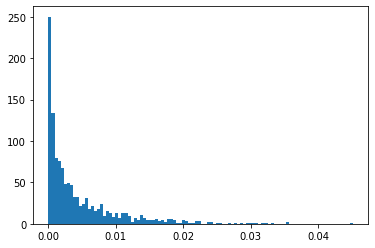

In [62]:
points = np.random.gamma(0.6, scale=0.0075,size=1200)
plt.hist(points, bins=100)

# Find the missing peaks
We will allow for at most a .05 Da m/z error. After this, we will consider a peak missing. 
The things we want to know here are:
1. The number of missing b and y ion peaks in each spectrum
2. The ration of b:y ion peaks that we find

This will help us understand how to better align our fake spectra to real spectra

In [63]:
def find_missing_ions(observed, reference, tolerance):
    missing = 0
    for mass in reference:
        closest = min([abs(mass - p) for p in observed])
        if closest > tolerance:
            missing += 1
    return missing

In [67]:
bd, yd, bs, ys = 0, 0, 0, 0
missing_bs, missing_ys, missing_bd, missing_yd = 0, 0, 0, 0
bys_ratios = []
byd_ratios = []
Da_tol = 0.05
for idx, row in df.iterrows():
    print('looking for missing ions in spectrum {}/{}\r'.format(idx, len(df)), end='')
    fname = row['filename']
    reference_spectrum_bs = gen_spectra.gen_spectrum(row['sequence'] + 'X', ion='b', charge=1)['spectrum']
    bs += len(reference_spectrum_bs)
    reference_spectrum_bd = gen_spectra.gen_spectrum(row['sequence'] + 'X', ion='b', charge=2)['spectrum']
    bd += len(reference_spectrum_bd)
    reference_spectrum_ys = gen_spectra.gen_spectrum(row['sequence'] + 'X', ion='y', charge=1)['spectrum']
    ys += len(reference_spectrum_ys)
    reference_spectrum_yd = gen_spectra.gen_spectrum(row['sequence'] + 'X', ion='y', charge=2)['spectrum']
    yd += len(reference_spectrum_yd)
    
    observed_spectrum = filter_by_intensity(list(filenameindexed[fname]['m/z array']), list(filenameindexed[fname]['intensity array']), 50)
    
    missing_bs += find_missing_ions(observed_spectrum, reference_spectrum_bs, Da_tol)
    missing_bd += find_missing_ions(observed_spectrum, reference_spectrum_bd, Da_tol)
    missing_ys += find_missing_ions(observed_spectrum, reference_spectrum_ys, Da_tol)
    missing_yd += find_missing_ions(observed_spectrum, reference_spectrum_yd, Da_tol)

    bys_ratios.append((bs-missing_bs, ys-missing_ys))
    byd_ratios.append((bd-missing_bd, yd-missing_yd))

Text(0.5, 1.0, 'missing ion percentage by ion type of top 50 peaks HeLa')

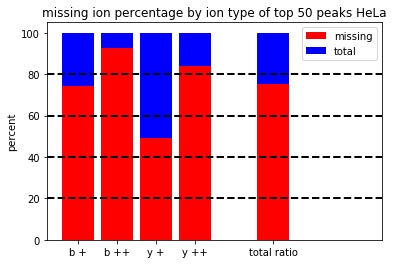

In [68]:
missing_bs_percent = 100 * missing_bs / bs 
missing_bd_percent = 100 * missing_bd / bd
missing_ys_percent = 100 * missing_ys / ys
missing_yd_percent = 100 * missing_yd / yd
total_ratio = 100 * (missing_bs + missing_bd + missing_ys + missing_yd) / (bs + bd + ys + yd)

plt.bar(0, missing_bs_percent, color='red', label='missing')
plt.bar(0, 100-missing_bs_percent, color='blue', bottom=missing_bs_percent, label='total')
plt.bar(1, missing_bd_percent, color='red')
plt.bar(1, 100-missing_bd_percent, color='blue', bottom=missing_bd_percent)
plt.bar(2, missing_ys_percent, color='red')
plt.bar(2, 100-missing_ys_percent, color='blue', bottom=missing_ys_percent)
plt.bar(3, missing_yd_percent, color='red')
plt.bar(3, 100-missing_yd_percent, color='blue', bottom=missing_yd_percent)
plt.bar(5, total_ratio, color='red')
plt.bar(5, 100-total_ratio, color='blue', bottom=total_ratio)
plt.bar(7, 0)

for threshold in [20, 40, 60, 80]:
    plt.axhline(y=threshold, linewidth=2, color='black', ls='--')

plt.ylabel('percent')
plt.xticks([0, 1, 2, 3, 5], ['b +', 'b ++', 'y +', 'y ++', 'total ratio'])
plt.legend()
plt.title('missing ion percentage by ion type of top 50 peaks HeLa')